## Importing the data from Kaggle

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [63]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory('./Rice_Image_Dataset',
                                                        validation_split = 0.2,
                                                        subset = 'training', 
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 50)

test_set = keras.utils.image_dataset_from_directory('./Rice_Image_Dataset',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 50)

Found 25000 files belonging to 5 classes.
Using 20000 files for training.
Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


In [64]:
train_data.cardinality().numpy(),  test_set.cardinality().numpy()

(400, 100)

In [65]:
train_set = train_data.take(250)
val_set = train_data.skip(250)

In [66]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(250, 150)

In [67]:
data_dir = pathlib.Path('./Rice_Image_Dataset')

for label in train_data.class_names:
  images = list(data_dir.glob(f'{label}/*'))
  print(f'{label} : {len(images)}')

Arborio : 5000
Basmati : 5000
Ipsala : 5000
Jasmine : 5000
Karacadag : 5000


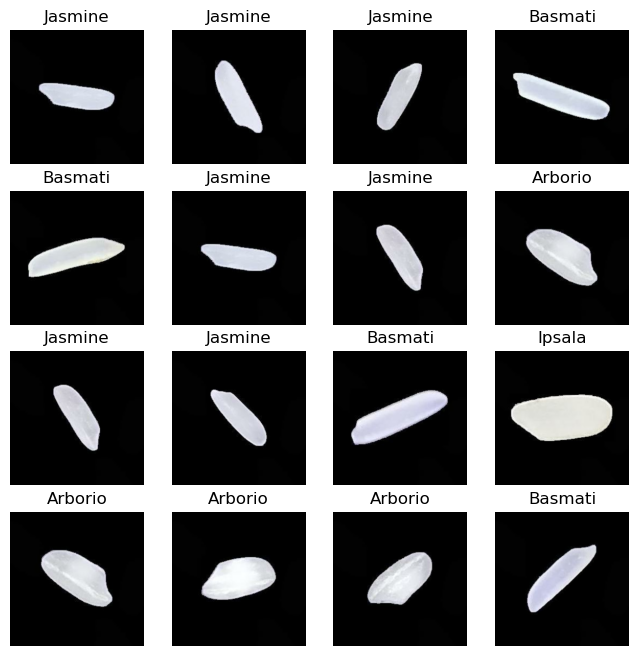

In [68]:
# print random images from the train set
plt.figure(figsize = (8, 8))
for images, labels in train_set.take(1):
  for i in range(16):
    index = random.randint(0, len(images))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[index]])
    plt.axis(False)

## Taining CNNs on the train images

In [69]:
for images_batch, labels_batch in train_set:
  print(images_batch.shape)
  print(labels_batch.shape)
  break

(50, 256, 256, 3)
(50,)


In [70]:
def plot_training_curves(history_df):
  plt.figure(figsize = (13, 4), dpi = 120)
  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
  plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  ax = plt.subplot(1, 2, 2) 
  plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
  plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()
  plt.show()

In [83]:
tf.random.set_seed(42)

cnn = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

cnn.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

In [85]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_7 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_contrast_7 (RandomCo  (None, 256, 256, 3)      0         
 ntrast)                                                         
                                                                 
 conv2d_33 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 127, 127, 64)     

In [86]:
history = cnn.fit(train_set, epochs = 15, validation_data = val_set)

Epoch 1/15
250/250 [==============================] - 940s 4s/step - loss: 0.0958 - accuracy: 0.9706 - val_loss: 0.0756 - val_accuracy: 0.9759
Epoch 2/15
250/250 [==============================] - 1355s 5s/step - loss: 0.0674 - accuracy: 0.9788 - val_loss: 0.0821 - val_accuracy: 0.9739
Epoch 3/15
250/250 [==============================] - 621s 2s/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0745 - val_accuracy: 0.9755
Epoch 4/15
250/250 [==============================] - 595s 2s/step - loss: 0.0544 - accuracy: 0.9821 - val_loss: 0.0847 - val_accuracy: 0.9729
Epoch 5/15
250/250 [==============================] - 592s 2s/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.0787 - val_accuracy: 0.9752
Epoch 6/15
250/250 [==============================] - 594s 2s/step - loss: 0.0403 - accuracy: 0.9855 - val_loss: 0.0950 - val_accuracy: 0.9747
Epoch 7/15
250/250 [==============================] - 587s 2s/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.0815 - val_accuracy: 0.974

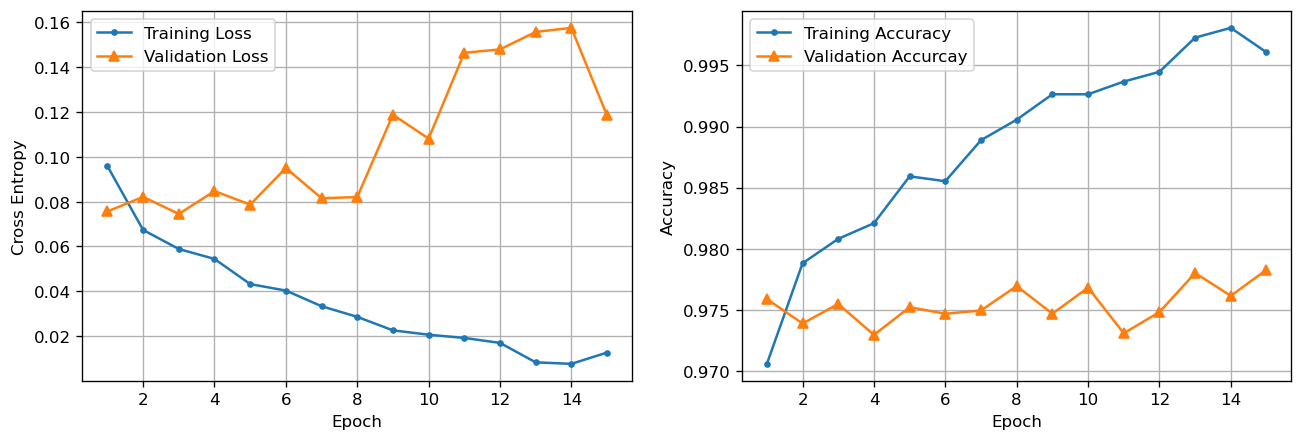

In [89]:
plot_training_curves(pd.DataFrame(history.history))

## Evaluation Of The CNN model

In [90]:
cnn.evaluate(val_set)

150/150 [==============================] - 106s 675ms/step - loss: 0.1182 - accuracy: 0.9785


[0.1181965321302414, 0.9785333275794983]

In [91]:
cnn.evaluate(test_set)

100/100 [==============================] - 49s 478ms/step - loss: 0.1108 - accuracy: 0.9748


[0.11077221482992172, 0.9747999906539917]

In [92]:
X_test, y_test = None, None
for images, labels in test_set.take(100):
  if X_test == None or y_test == None:
    X_test = images
    y_test = labels
  else:
    X_test = tf.concat([X_test, images], axis = 0)
    y_test = tf.concat([y_test, labels], axis = 0)
  
X_test.shape, y_test.shape

(TensorShape([5000, 256, 256, 3]), TensorShape([5000]))

In [93]:
y_pred_proba = cnn.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)
metrics.accuracy_score(y_test, y_pred)

157/157 [==============================] - 78s 287ms/step


0.9748

In [94]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       985
           1       0.99      0.99      0.99      1061
           2       1.00      0.99      0.99       970
           3       0.98      0.99      0.99       992
           4       0.95      0.96      0.95       992

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


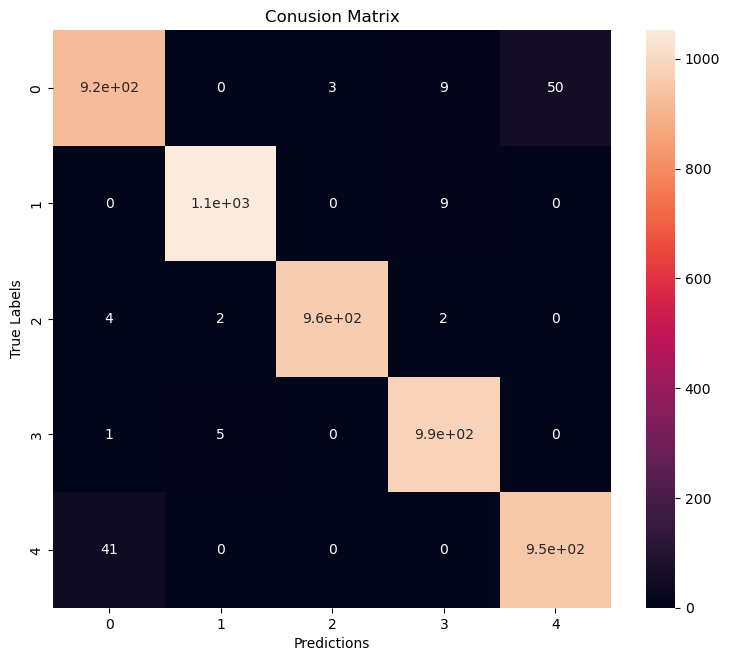

In [98]:
print(test_set.class_names)
plt.figure(figsize = (9, 7.5), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [96]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

  shuffled_data = dataset.shuffle(10)
  class_names = dataset.class_names

  for images, labels in shuffled_data.take(1):
    plt.figure(figsize = (12, 12), dpi = 120)
    y_pred_proba = model.predict(images)

    for i in range(16):
      index = random.randint(0, len(images))
      ax = plt.subplot(4, 4, i + 1)

      img = images[index].numpy().astype("uint8")
      y_true = class_names[labels[index]]
      y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
      c = 'g' if y_pred == y_true else 'r'
      
      plt.imshow(img)
      plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
      plt.axis(False)

2/2 [==============================] - 1s 361ms/step


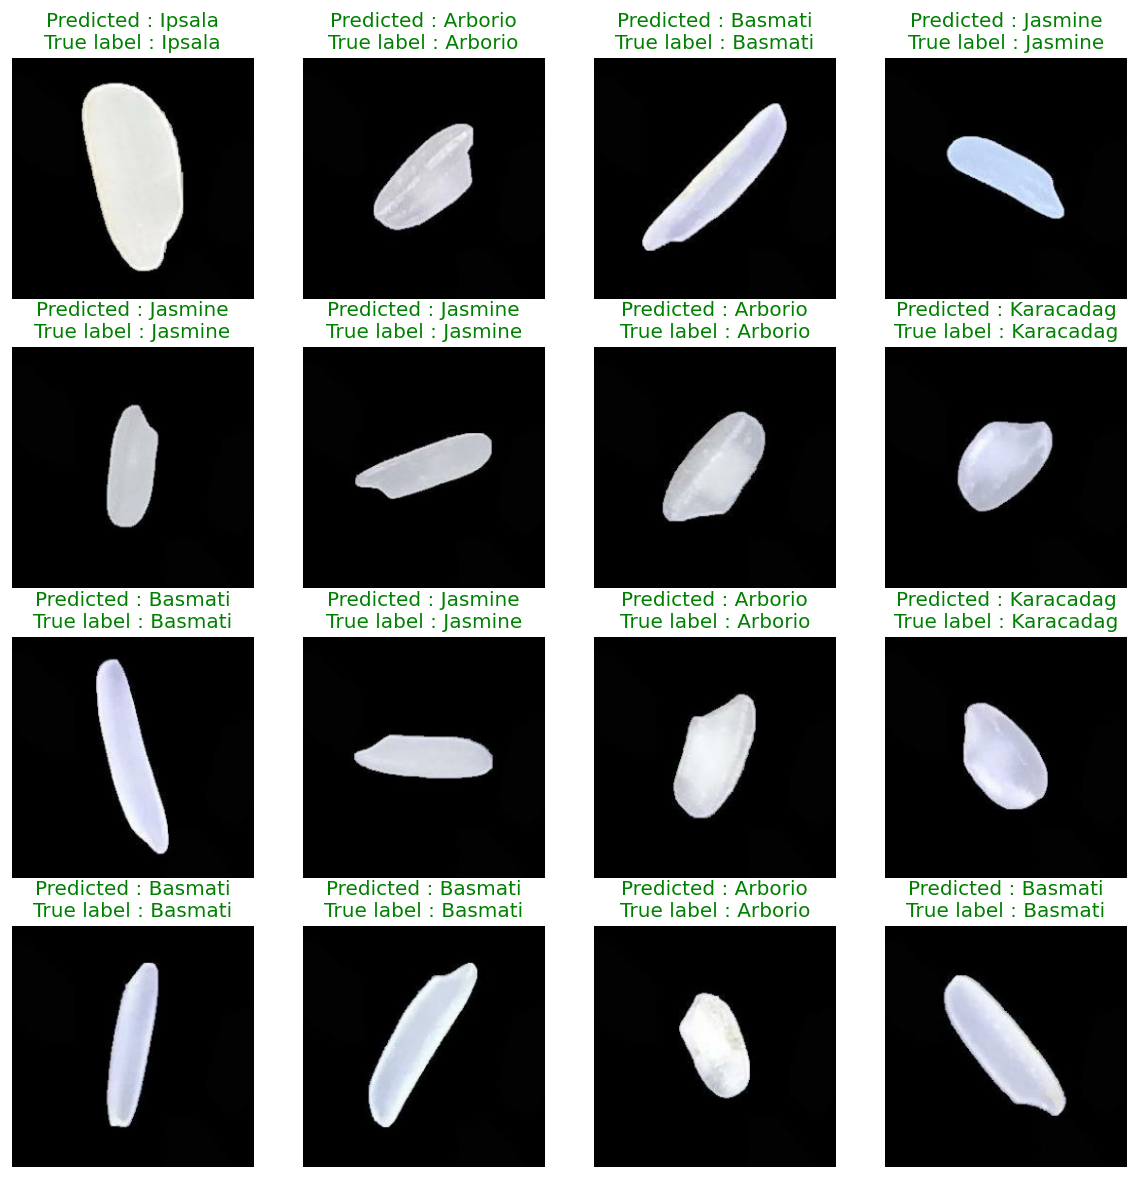

In [97]:
plot_random_predictions(test_set, cnn)